In [1]:
# General-purpose libraries
import os  # File handling
import numpy as np  # Numerical operations
import pandas as pd  # Data manipulation

# Data visualization
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Advanced visualizations
import plotly.express as px  # Interactive visualizations

# Machine Learning and Deep Learning
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # Data normalization/scaling
from sklearn.model_selection import train_test_split  # Train-test data splitting
import tensorflow as tf  # Deep learning framework
import torch  # PyTorch for deep learning
import stable_baselines3  # Pre-built reinforcement learning algorithms

# Time-Series Analysis
from statsmodels.tsa.stattools import adfuller  # Augmented Dickey-Fuller test for stationarity
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # Auto-correlation and partial auto-correlation
from statsmodels.tsa.arima.model import ARIMA

# H2O Framework
import h2o
from h2o.automl import H2OAutoML  # Automated machine learning

# System utilities and warnings
import warnings
warnings.filterwarnings('ignore')  # Ignore warnings for a clean output

/usr/local/lib/python3.10/dist-packages/h2o/model/model_base.py:913: DeprecationWarning: invalid escape sequence '\s'
  """
/usr/local/lib/python3.10/dist-packages/h2o/estimators/xgboost.py:2559: DeprecationWarning: invalid escape sequence '\*'
  """


In [2]:
# Importing Data
df = pd.read_csv("/kaggle/input/stock-market-dataset/etfs/AAAU.csv")

In [3]:
# Prepare Data
df['Date'] = pd.to_datetime(df['Date'])   # Convert to datetime
df = df.sort_values(by='Date')            # Sort by date
df_reset = df.reset_index()               # Make 'Date' a column again


In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-15,11.84,11.84,11.74,11.74,11.74,27300
1,2018-08-16,11.78,11.80,11.74,11.74,11.74,428400
2,2018-08-17,11.80,11.82,11.77,11.82,11.82,52400
3,2018-08-20,11.88,11.91,11.85,11.90,11.90,28700
4,2018-08-21,11.92,11.95,11.89,11.93,11.93,30600


In [5]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
405,2020-03-26,16.450001,16.530001,16.23,16.400000,16.400000,212400
406,2020-03-27,16.350000,16.379999,16.25,16.290001,16.290001,172500
407,2020-03-30,16.290001,16.330000,16.09,16.240000,16.240000,536900
408,2020-03-31,16.000000,16.090000,15.71,15.720000,15.720000,193700
409,2020-04-01,15.740000,16.160000,15.68,15.870000,15.870000,296200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       410 non-null    datetime64[ns]
 1   Open       410 non-null    float64       
 2   High       410 non-null    float64       
 3   Low        410 non-null    float64       
 4   Close      410 non-null    float64       
 5   Adj Close  410 non-null    float64       
 6   Volume     410 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 22.5 KB


In [8]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df['Volume'].value_counts().mean()


1.1714285714285715

<Axes: xlabel='Volume'>

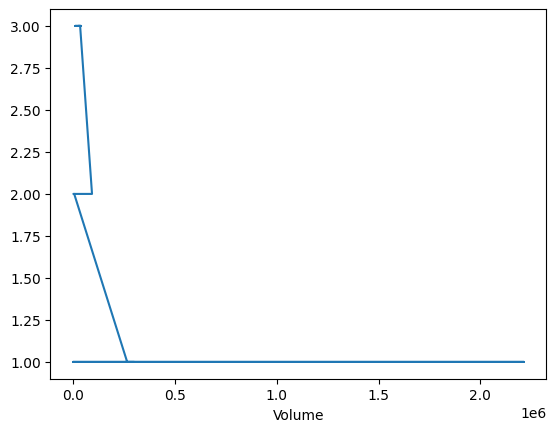

In [11]:
df['Volume'].value_counts().plot(kind="line")

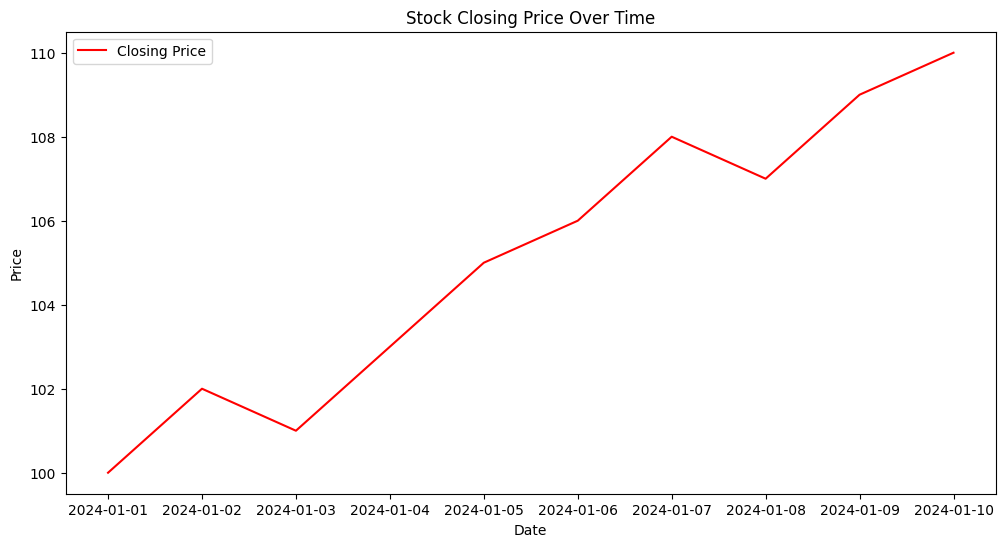

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample stock data
data = {
    'Date': pd.date_range(start='2024-01-01', periods=10, freq='D'),
    'Close': [100, 102, 101, 103, 105, 106, 108, 107, 109, 110]
}
df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color="red")
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Closing Price Over Time')
plt.legend()
plt.show()


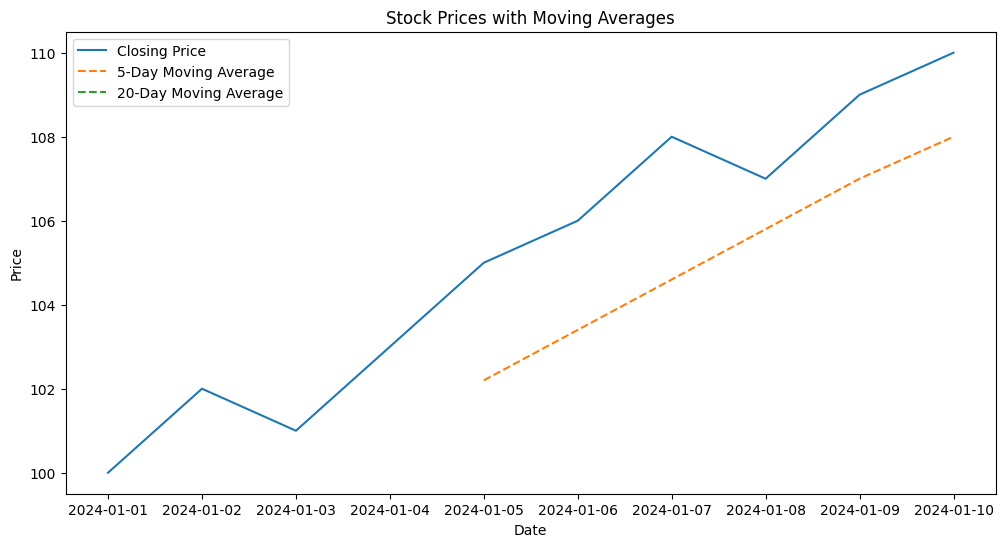

In [13]:
import pandas as pd

df['MA_5'] = df['Close'].rolling(window=5).mean()
df['MA_20'] = df['Close'].rolling(window=20).mean()

# Visualize Moving Averages
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.plot(df['Date'], df['MA_5'], label='5-Day Moving Average', linestyle='--')
plt.plot(df['Date'], df['MA_20'], label='20-Day Moving Average', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('Stock Prices with Moving Averages')
plt.show()

In [16]:
import plotly.express as px

fig = px.line(df_reset, x='Date', y='Volume', title='Volume Over Time')
fig.show()


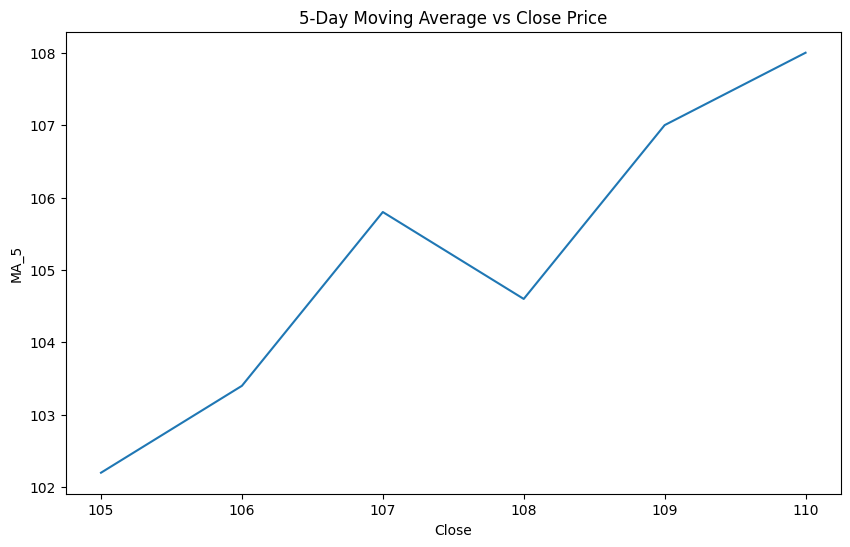

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Close", y="MA_5")
plt.title("5-Day Moving Average vs Close Price")
plt.show()


In [33]:
# Only convert and set index once
df.index = pd.to_datetime(df.index)  # Convert index to datetime
df = df.sort_index()  # Sort by the datetime index

print(df.head())


            Close   MA_5  MA_20  Daily_Return
Date                                         
2024-01-01    100    NaN    NaN           NaN
2024-01-02    102    NaN    NaN      0.020000
2024-01-03    101    NaN    NaN     -0.009804
2024-01-04    103    NaN    NaN      0.019802
2024-01-05    105  102.2    NaN      0.019417


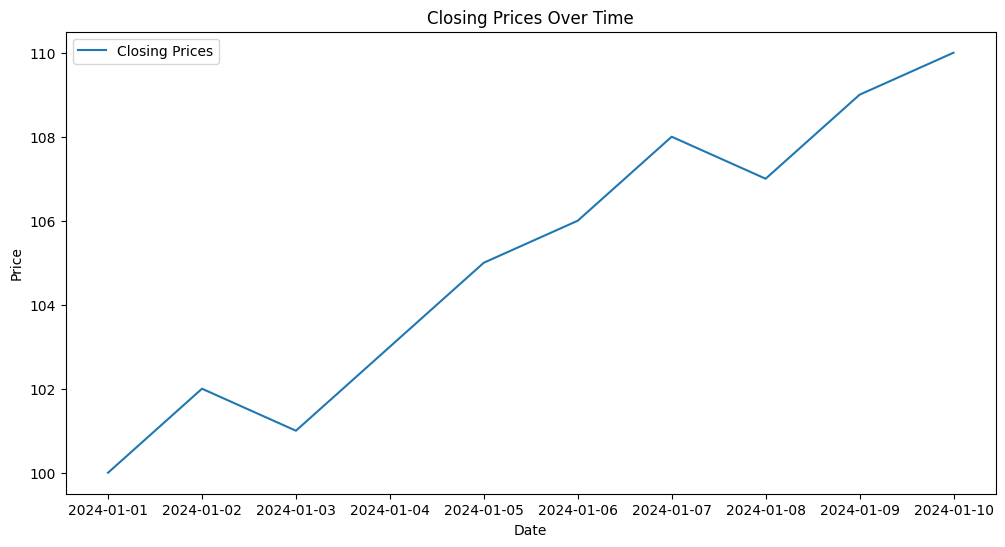

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Closing Prices')
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


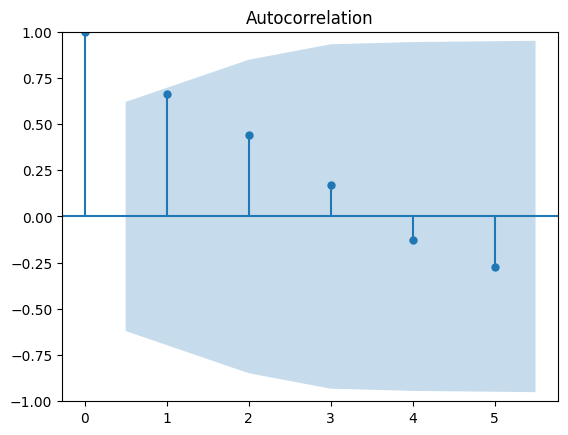

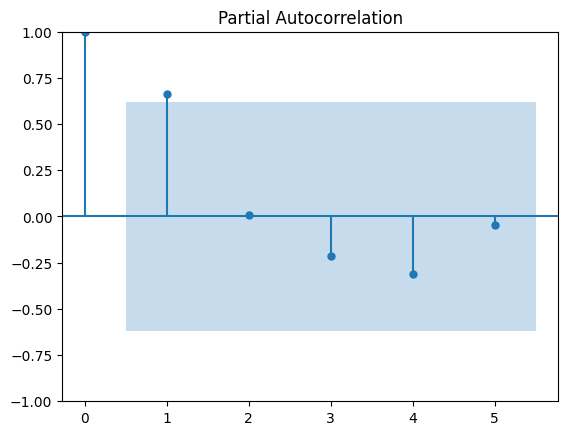

In [35]:
plot_acf(df['Close'])
plot_pacf(df['Close'])
plt.show()


In [36]:
df['Daily_Return'] = df['Close'].pct_change()

# Rolling moving averages
df['MA_5'] = df['Close'].rolling(window=5).mean()
df['MA_20'] = df['Close'].rolling(window=20).mean()

print(df[['Close', 'Daily_Return', 'MA_5', 'MA_20']].head())


            Close  Daily_Return   MA_5  MA_20
Date                                         
2024-01-01    100           NaN    NaN    NaN
2024-01-02    102      0.020000    NaN    NaN
2024-01-03    101     -0.009804    NaN    NaN
2024-01-04    103      0.019802    NaN    NaN
2024-01-05    105      0.019417  102.2    NaN


In [37]:

result = adfuller(df['Close'].dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
if result[1] < 0.05:
    print("Data is stationary.")
else:
    print("Data is not stationary, consider differencing.")


ADF Statistic: 0.0202347244413039
p-value: 0.9601738344972545
Data is not stationary, consider differencing.


In [38]:
# Fit ARIMA model

model = ARIMA(df['Close'], order=(1, 1, 1))  # (p, d, q)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   10
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -15.882
Date:                Sat, 03 May 2025   AIC                             37.764
Time:                        18:58:31   BIC                             38.356
Sample:                    01-01-2024   HQIC                            36.487
                         - 01-10-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.275      3.642      0.000       0.462       1.538
ma.L1         -0.9956     40.285     -0.025      0.980     -79.953      77.962
sigma2         1.6182     64.216      0.025      0.9

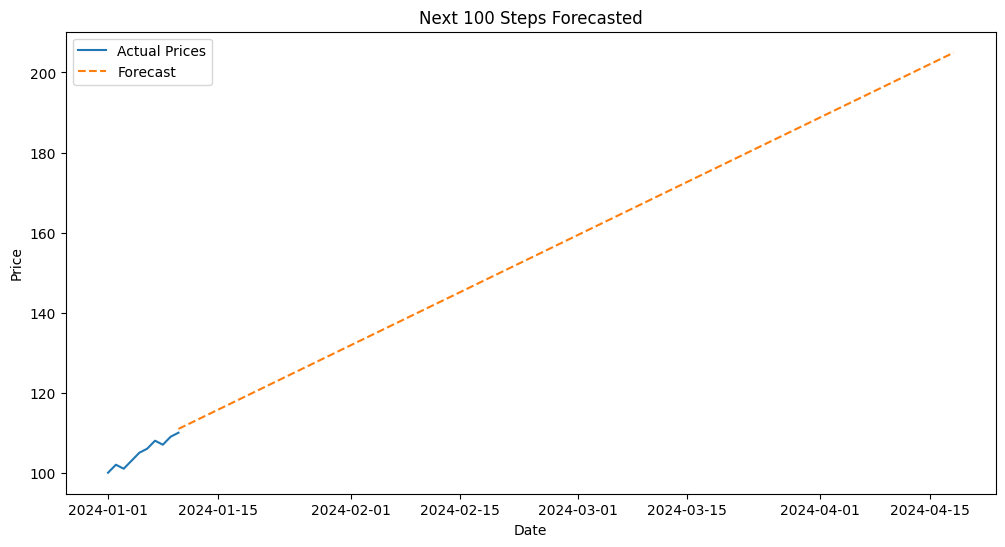

In [39]:

model = ARIMA(df['Close'], order=(1, 1, 1))  # (p, d, q) parameters, adjust as needed
model_fit = model.fit()

# Forecast the next 100 steps
forecast = model_fit.forecast(steps=100)

# Create a range of future dates
last_date = df.index[-1]
future_dates = pd.date_range(last_date, periods=100, freq='D')

# Plot the actual data and forecasted points
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Actual Prices')
plt.plot(future_dates, forecast, label='Forecast', linestyle='--')
plt.title('Next 100 Steps Forecasted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [41]:
from sklearn.metrics import mean_absolute_error

# Assuming you have a test dataset with true values
true_values = df['Close'][-10:]  # Replace with actual test values
predicted_values = forecast[:10]
mae = mean_absolute_error(true_values, predicted_values)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 10.124934757206116
